Machine Learning Intro
======================



## Machine Learning Intro



<div class="abstract" id="org2b8015e">
<p>
Machine learning is an inherently under constrained problem due to the expressive power of the models coupled with finite data. In this worksheet we will look at two separate problems that allows us to formulate this process mathematically and implement the results. Importantly we will go through the two examples of the same thing so rather than rushing to finish the worksheet aim to really understand one of the part.
</p>

</div>

Throughout the lectures you have seen the application of the product and sum rule of probability that is referred to as Baye's rule,

$$
  p(\theta \mid \mathcal{D}) = \frac{p(\mathcal{D}\mid \theta)p(\theta)}{\int p(\mathcal{D}\mid\ \theta)p(\theta)\textrm{d}\theta},
  $$
where the data that we have observed is referred to as $\mathcal{D}$ and the parameters that describes or models the data are $\theta$. Now what we are interested in is to understand the parameters $\theta$ in light of the information that is provided in the data. This is the distribution on the left, $p(\theta\mid\mathcal{D})$, encoding the distribution over the parameter space conditioned on the data. The objects that we describe, where we place our knowledge before we observe the data is on the right. The first term $p(\mathcal{D}\mid \theta)$ is the likelihood and the second term $p(\theta)$ is the prior. What we will now proceed to do is to specify these two terms for two specific cases and see how we can reach the right-hand side posterior.



### Bernoulli Coin Tosses



Our first example is going to be that of a system that has a binary outcome and we want to from data extract which preference for the two different outcomes is inherent in the system. The easiest analogy is a coin toss, with outcome heads or tails and we want to figure out if the coin is biased towards a specific outcome.



#### Likelihood



The first thing we need to think of is what is the likelihood function. For a binary system it makes sense to use a `Bernoulli Distribution` as likelihood function,
$$
    p(x\vert \mu) = \text{Bern}(x|\mu) = \mu^x(1-\mu)^{1-x}.
    $$
This distribution takes a single parameter $\mu$ which completely parametrises our likelihood. This means, we have a conditional distribution and the system is completely specified by $\mu$. If we know $\mu$ we can generate output that is similar to what the actual system does, this means we can predict how the system behaves. Now we want to use examples or predictions from the system i.e `training data` to find $\mu$. So far we have only set the likelihood for one data-point, what about when we see lots of them? Now we will make our first assumption, we will assume that each output of the system is independent. Mathematically independence means that we can factorise the distribution over several trials in a simple manner,
$$
    p(\mathbf{x}|\mu) = \prod_{i=1}^N \text{Bern}(x|\mu) = \prod_{i=1}^N \mu^x(1-\mu)^{1-x}.
    $$
Now we have the likelihood for the whole data-set $\mathbf{x}$. Think a bit about what this assumption implies. It means that,

1.  each data-point is independent as our likelihood function is invariant to any permutation of the data.
2.  it assumes that each of the data-points are generated by the same distribution. For the coin example this means that by tossing the coin you do not change the actual coin by the act of tossing it.



#### Prior



In order to say something about the system we need to have a prior belief about what we think the parameter $\mu$ is. Now our prior knowledge comes into play, what do I know about the system? If our system is the outcome of a coin toss then we have a lot of prior knowledge, most coins that I toss are unbiased so I have quite a good idea of what I think it should be. Another way of seeing this is that I would need to see a lot of coin tosses saying something else for me to believe that a coin is not biased. If it is not a coin toss but something that I have less experience in my prior might be different. Once we have specified the prior we can use Bayes' rule and get the posterior,
$$
    p(\mu|\mathbf{x}) = \frac{p(\mathbf{x}|\mu)p(\mu)}{p(\mathbf{x})}.
    $$

Now comes the first tricky part, what should the distribution be for the prior? If you choose your prior or likelihood in a specific way then this computation might not even be analytically possible to perform. So this is when we will use the concept of *conjugacy*. First lets note that the posterior distribution is proportional to the likelihood times the prior (or the joint distribution),
$$
    p(\mu|\mathbf{x}) \propto p(\mathbf{x}|\mu)p(\mu).
    $$
The second thing we will think of is that it does make sense that if I have a prior of a specific form (say a Gaussian) then I would like the posterior to be of the same form (i.e. Gaussian). So this means that we should *choose* a prior such that when multiplied with the likelihood it leads to a distribution that is of the same form of the prior. So why is this useful? This is very useful because it means we do **not** have to compute the denominator in Baye's rule, the only thing we need to do is to multiply the prior with the likelihood and then **identify** the parameters that of the distribution, we can do this as we know its form.

So how do we know which distributions are conjugate to what? Well this is something that we leave to the mathematicians most of the time, we simply exploit their results. There is a list on Wikipedia of conjugate priors here [URL](https://en.wikipedia.org/wiki/Conjugate_prior). Its like a match making list for distributions. For the Bernoulli distribution the conjugate prior to its only parameter $\mu$ is the `Beta` distribution,
$$
    \text{Beta}(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1},
    $$
where $\Gamma(\cdot)$ is the gamma function. The role of the Gamma function is to normalise this to make sure it becomes a distribution not just any function. Now we have choosen our prior we are ready to derive the posterior.



#### Posterior



To get to the posterior we are going to multiply the likelihood and the prior together,

$$
    p(\mu|\mathbf{x}) \propto p(\mathbf{x}|\mu)p(\mu)
    $$
$$
    \prod_{i=1}^N \text{Bern}(x|\mu) \text{Beta}(\mu|a,b)
    $$
$$
    \prod_{i=1}^N \mu^x_i(1-\mu)^{1-x_i} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
    $$
$$
    \mu^{\sum_i x_i}(1-\mu)^{\sum_i (1-x_i)} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
    $$
$$
    \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{\sum_i x_i}(1-\mu)^{\sum_i (1-x_i)} \mu^{a-1}(1-\mu)^{b-1}
    $$
$$
    \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{\sum_i x_i + a-1}(1-\mu)^{\sum_i (1-x_i)+b-1}.
    $$

Now comes the trick with conjugacy, *we know the form of the posterior*. This means we can just identify the parameters of the posterior and in this case it is trivial,
$$
    p(\mu\vert \mathbf{x}) \propto \mu^{\underbrace{\sum_i x_i + a-1}_{a_n-1}}(1-\mu)^{\underbrace{\sum_i (1-x_i)+b-1}_{b_n-1}}.
    $$
Now what is left is to make sure that the expression is actually a probability distribution such that it integrates to one. This means that we need to solve the following,
$$
    1 = Z \int p(\mu\vert \mathbf{x})\textrm{d}\mu = Z \int \mu^{a_n-1}(1-\mu)^{b_n-1}\textrm{d}\mu.
    $$
In this case this is trivial as we know the normaliser of the beta distribution which means that,
$$
    Z = \frac{\Gamma(a_n+b_n)}{\Gamma(a_n)\Gamma(b_n)}
    $$
This mean that our posterior is,
$$
    p(\mu\vert \mathbf{x}) = \text{Beta}(\mu|a_n,b_n) = \frac{\Gamma\left(\sum_i x_i + a+\sum_i (1-x_i)+b\right)}{\Gamma\left(\sum_i x_i + a\right)\Gamma\left(\sum_i (1-x_i)+b\right)} \mu^{\sum_i x_i + a-1}(1-\mu)^{\sum_i (1-x_i)+b-1}
    $$
So thats it, we have the posterior and now we can fix our parameters for the prior $a$ and $b$ and then compute the posterior and get $a_n$ and $b_n$ after seeing $n$ data-points. So lets write code that simulates one of these experiments.  



#### Implementation



Common practice if you want to test something is to generate data from your model with known parameters, throw away the parameters and then see if you can recover the parameter. What we first then want to do is to sample a large set of binary outcomes. We can do this by using the [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution) in `numpy`. So we start of with setting $\mu$ to $0.2$ and then generate $200$ values from this distribution, i.e. running the system 200 iterations or tossing a coin 200 times. Then we define our prior by setting the parameters $a$ and $b$. Now we can compute our posterior, we know its form, we both derived it above, but in most cases you just write it down, that is what you will do for linear regression. Now we can plot the posterior when we see more and more examples and see what will happen.

We will begin by generating some data that by specifying using a known value of $\mu$.    



In [1]:
import numpy as np

# parameters to generate data
mu = 0.2
N = 100

# generate some data
X = np.random.binomial(1,mu,N)

Now we will forget about the value of $\mu$ and see if we can recover it using the procedure we described above. To do so we need to first describe our prior. To do so we will import the `beta` distribution from `scipy` and generate a set of evaluation locations for $\mu$.



In [1]:
from scipy.stats import beta
# define evaluation points of mu
mu_test = np.linspace(0,1,100)

# define prior
a = 10
b = 10

# p(mu) = Beta(alpha,beta)
prior_mu = beta.pdf(mu_test,a,b)

Now we are ready to implement our posterior as we derived above



In [1]:
a_n = a + X.sum()
b_n = b + (X.shape[0]-X.sum())
posterior_mu = beta.pdf(mu_test,a_n,b_n)

Now we can visualise the distribution posterior distribution by plotting the posterior evaluated at the test locations.



In [1]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# plot prior
ax.plot(mu_test,prior_mu,'g')
ax.fill_between(mu_test,prior_mu,color='green',alpha=0.3)

# plot posterior
ax.plot(mu_test,posterior_mu,'r')
ax.fill_between(mu_test,posterior_mu,color='red',alpha=0.3)

ax.set_xlim([0,1])
ax.set_ylim([0,10])
ax.plot([mu, mu], [0,10], linewidth=3.0, linestyle='--', color='black', zorder=2)

In the plot we can see how our data have updated our belief about the system in two ways. First the mean of the posterior have changed location and have moved from $0.5$ towards $0.2$ and furthermore the variance of the posterior is significantly smaller compared to the prior. Now in this case we used $100$ coin tosses and it is maybe a little bit surprising that even after so many there isn't sufficient evidence in the data that we can recover the true generating parameters. However, you have to take the prior into account here as this is what we need to overcome. There is very little probability mass over $\mu=0.2$ in our prior so when we there is quite a bit of convincing that needs to be done. This is an important intuition of what a prior is, the prior actually encodes what is the value of an observation for a specific hypothesis. Think about it like this, if I should try to convince you that the earth is flat I bet you I would have to show you quite a lot of evidence for you to change your opinion because you are *very sceptical towards anything that supports this conclusion* this is what your prior encodes a quantification of your scepticism for each observed data.

Lets dive a little bit deeper into this by looking at how the posterior gets updated for each new data-point that we see. The code below is just a copy of what you have just implemented but a little bit more flexible so that we can look at how the posterior changes when we see more and more data. Lets start with a quite extreme case, we are incredibly certain that the coin is biased towards $1$ and lets see how our posterior updates.



#+RESULTS[ab83f8d76a138fba82410dcb9856883c755ffdb3]:
   :results:
   # Out[1]:
   : [<matplotlib.lines.Line2D at 0x7f3b6c0b6190>]
   
   :end:

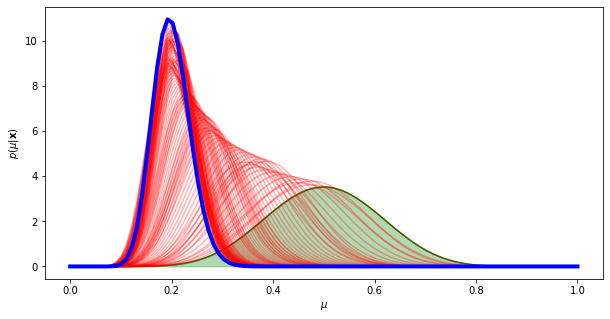

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

def posterior(a,b,X):
    a_n = a + X.sum()
    b_n = b + (X.shape[0]-X.sum())

    return beta.pdf(mu_test,a_n,b_n)

# parameters to generate data
mu = 0.2
N = 100

# generate some data
X = np.random.binomial(1,mu,N)
mu_test = np.linspace(0,1,100)

# now lets define our prior
a = 10
b = 10

# p(mu) = Beta(alpha,beta)
prior_mu = beta.pdf(mu_test,a,b)

# create figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# plot prior
ax.plot(mu_test,prior_mu,'g')
ax.fill_between(mu_test,prior_mu,color='green',alpha=0.3)

ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')

# lets pick a random (uniform) point from the data
# and update our assumption with this
index = np.random.permutation(X.shape[0])
for i in range(0,X.shape[0]):
    y = posterior(a,b,X[:index[i]])
    plt.plot(mu_test,y,'r',alpha=0.3)

y = posterior(a,b,X)
plt.plot(mu_test,y,'b',linewidth=4.0)

As you can see from the plot above a new interesting behaviour happens, the posterior first becomes wider and then narrows as we get closer to the generating parameters of the data. This makes perfect sense, we see something that is very far from our belief, so we first get confused before we become certain again. Now use the code to play around with different assumptions and try to get an idea of how the posterior changes.



#### Summary



So this was it, machine learning! While the example we looked at was a bit silly what we did on a more abstract level was everything but. We mathematically defined the a model that formalised our beliefs about the world, we combined this knowledge with data through computation and in the end we reached an updated belief. The motivation for looking at this example first was because it is mathematically simple when we have more complicated relationships between our model and data we get more complicated likelihoods and our knowledge about a system is often more complex than a Beta distribution. This quickly leads to computations which are analytically intractable as we cannot reach the posterior distribution in closed form.



### Linear Regression



Before we wrap up we will look at a slightly more complicated example that of linear regression. The math becomes a little bit more complicated in this case so to keep with the more abstract message we will avoid deriving the posterior. The key thing to see is that we are using exactly the same structure to learn, we formulate our beliefs and we integrate it with observed data to get an updated belief.

We observe a data-set $\mathcal{D} = \{\tilde{x}_i, y_i \}_{i=1}^N$ where we assume the following relationship between the variates,  
$$
   y_i = f(\tilde{x}_i).
   $$
Our task is to infer the function $f(\cdot$) from $\mathcal{D}$. To simplify things we are going to limit the hypothesis space to be only of linear functions. This means that we can write the expression as,
$$
   y_i = w_1\tilde{x}_i + w_0 = \mathbf{w}^{\textrm{T}}\mathbf{x}_i = \left[\begin{array}{c} w_1\\w_0\end{array}\right]^{\textrm{T}}\left[\begin{array}{c}\tilde{x}_i\\ 1\end{array}\right]
   $$
where we have rewritten the input variate by appending a one so that we can write everything on matrix form. The task that we will perform in this lab is to infer the function parametrised by $\mathbf{w}$ by observing $\mathcal{D}$.



#### Likelihood



The next step is for us to define a likelihood function. We will do so by making a set of assumptions. First we will assume that the data we observe is not instantiations of the "true" underlying function but rather have been corrupted by *addative* noise.
    $$
    y_i = \mathbf{w}^{\textrm{T}}\mathbf{x}_i + \epsilon.
    $$
    Now can we make an argument what form this noise will take? One assumption would be to say that the noise is independent of where in the input space we evaluate the function, this is called *homogenous* noise. Furthermore we could argue that we know the form of the noise, one idea would be to say that the noise is Gaussian,
    $$
    \epsilon \sim \mathcal{N}(0,\beta^{-1}),
    $$
    with precision $\beta$. Now this would mean is that if we could directly observe the noise we could formulate a likelihood as,
    $$
    p(\epsilon) = \mathcal{N}(\epsilon\vert 0,\beta^{-1}).
    $$
    If we now combine this new expression of the noise with the assumption of the stochastic form in we get,
    $$\begin{eqnarray}
    p(\epsilon) &= \mathcal{N}(\epsilon\vert 0,\beta^{-1})\\
    &= \mathcal{N}(y_i - \mathbf{w}^{\textrm{T}}x_i\vert 0,\beta^{-1})\\
    &= \mathcal{N}(y_i\vert\mathbf{w}^{\textrm{T}}x_i,\beta^{-1}).
    \end{eqnarray}$$
    What we have just done is to formulate a likelihood function. It describes how likely an observed output location is to have come from the a specific parametrisation of the function. Or more precisely this is the function that quantifies how much evidence a specific data point provides for a specific model. Importantly we justified it by thinking about noise.

Now the formulation is for a single data-point but if we assume that the noise is independent we can easily formulate the likelihood for a set of data,
$$
    p(\mathbf{y}\vert \mathbf{w},\mathbf{X}) = \prod_{i=1}^N p(y_i \vert \mathbf{w}, \mathbf{x}_i),
    $$
where $\mathbf{X} = [x_1,\ldots,x_N]^{\textrm{T}}$ and $\mathbf{y} = [y_1,\ldots,y_N]^{\textrm{T}}$.

Think back to the Bernoulli trial, its exactly the same thing. One important difference is how we motivated the construction of the likelihood, it came through making an assumption of the structure of the noise. Concretely we made three assumptions,

1.  the noise is addative
2.  the noise is Gaussian
3.  the noise is independent of the input location.

These assumptions needs to be justified on a problem to problem basis. Say for example that we are measuring the vibrations in a car as a function of speed. It might be the case that the noise in the sensor measuring the vibrations also depends on the speed of the car then we should not use a homoscedastic noise model. Here to keep things simple we will only look at artificial data but later on in the module we will look at examples where we have prior knowledge.

So now we have our likelihood function and if we knew the parameters of the function $\mathbf{w}$ we would be able to generate data. However, we want to infer the these parameters from the data and to do so we need to formulate our beliefs over different parametrisations using a prior distribution.



#### Prior



The next step is to formulate a prior assumption over the parameters that we want to infer. For the regression case the parameters are $p(\mathbf{w})$ and here we will again use a Gaussian prior such that,
    $$
    p(\mathbf{w}) = \mathcal{N}(\mathbf{w}_0, \mathbf{S}_0)
    $$
    $$
    \mathbf{S}_0 = \lambda\mathbf{I}
    $$
    The structure of the prior covariance tells us that we assume that the two parameters $w_1$ and $w_0$ are independent with equal variance.

Think about this assumption, does this make sense for a line? Well the great thing about distributions is that you can sample from them and generate the results that you can reason about. The code below will generate sample lines where $\mathbf{w}_0 = \boldsymbol{0}$ and $\mathbf{S}_0 = \mathbf{I}$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line(ax, w):
    # input data
    X = np.zeros((2,2))
    X[0,0] = -5.0
    X[1,0] = 5.0
    X[:,1] = 1.0

    # because of the concatenation we have to flip the transpose
    y = w.dot(X.T)
    ax.plot(X[:,0], y)
    
# create prior distribution
tau = 1.0*np.eye(2)
w_0 = np.zeros((2,1))

# sample from prior
n_samples = 100

w_samp = np.random.multivariate_normal(w_0.flatten(), tau, size=n_samples)

# create plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for i in range(0, w_samp.shape[0]):
    plot_line(ax, w_samp[i,:])

Play around with the paramters to see what type of belief the parameters relates to.



#### Posterior



Now we have encoded our prior belief and we have formulated our likelihood function and its time to formulate the posterior distribution. We will do exactly the same thing as we did in the Bernoulli trial but the math is quite a bit more complicated so we will not this explicitly here. If you are interested in seeing the full derivation you can look [here](https://mlatcl.github.io/mlphysical/notes/01_introduction.pdf). As it turns out Gaussian's are self-conjugate which means that our posterior will also be a Gaussian with this specific form.
    $$
    p(\mathbf{w}\vert \mathbf{y},\mathbf{X}) = \mathcal{N}\left(\mathbf{w}\vert \left(\mathbf{S}_0^{-1} + \beta \mathbf{X}^{\textrm{T}}\mathbf{X}\right)^{-1}\left(\mathbf{S}_0^{-1}\mathbf{w}_0 + \beta\mathbf{X}^{\textrm{T}}\mathbf{y}\right),\left(\mathbf{S}_0^{-1} + \beta \mathbf{X}^{\textrm{T}}\mathbf{X}\right)^{-1}\right).
    $$
    The expression above looks rather daunting at first but actually does make a lot of sense when you start looking at it. One way of making sense of the posterior is to look at some extreme scenarios, think about the following

1.  what would happen if you assume a noise-free situation i.e. $\beta\rightarrow \infty$
2.  what would happen if we assume a zero mean prior?
3.  what happens if we do not observe any data?
4.  when you observe more and more data which terms are going to dominate posterior?



#### Implementation



Once you have done the mathematical interogation of the posterior it is time to evaluate the model by generating some data and then aim to recover the parameters that generated this specific data. Again, just the same proceedure as we did in the Bernoulli trial. First we will generate some toy data, throw away the parameters and see if we can recover them. The code below implements something similar to what we did in the Bernoulli trial, it shows the posterior after seeing more and more data (left column) and samples together with the observed data (right column). Try to play around with the parameters and the settings so that you get an intuitive feeling for how it works.



:results:
    # Out[4]:
    
    :end:

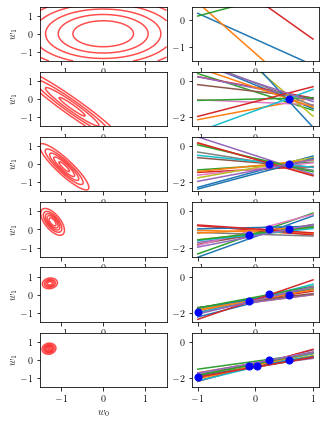

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

def posterior(m0,S0,beta,phi,t):

    SN = np.linalg.inv(np.linalg.inv(S0)+beta*phi.dot(phi.T))
    mN = SN.dot(np.linalg.inv(S0).dot(m0)+beta*phi.dot(t))

    return mN, SN

def plotdistribution(ax,mu,Sigma):
    x = np.linspace(-1.5,1.5,100)
    x1p, x2p = np.meshgrid(x,x)
    pos = np.vstack((x1p.flatten(), x2p.flatten())).T

    pdf = multivariate_normal(mu.flatten(), Sigma)
    Z = pdf.pdf(pos)
    Z = Z.reshape(100,100)

    ax.contour(x1p,x2p,Z, 5, colors='r', alpha=0.7)
    ax.set_xlabel(r'$w_0$')
    ax.set_ylabel(r'$w_1$')

    return

def plotsamples(ax,mN,SN,nr_samples):
    w = np.random.multivariate_normal(mN.flatten(),SN,nr_samples)
    for i in range(0,nr_samples):
        xs = np.array([[1,1],[-1,1]])
        ys = w[i,:].dot(xs)
        ax.plot(xs[1,:],ys,zorder=1)
    return

# plot parameters
n=6
n0=0

# generate the data
N = 30
x = np.linspace(-1,1,N)
x = np.vstack((np.ones(N),x))
index = np.random.permutation(N)
w = np.array([[-1.3],[0.5]])
y = x.T.dot(w) + 0.1*np.random.randn(x.shape[1],1)

beta = 25.0
m0 = np.zeros((2,1))
S0 = 2.0*np.eye(2)

fig = plt.figure(figsize=(5,7))

plot_id = 1
for i in range(n0,n):
    if(i==0):
        ax = fig.add_subplot(n-n0,2,2*i+1)
        plotdistribution(ax,m0,S0)
        ax = fig.add_subplot(n-n0,2,2*i+2)
        plotsamples(ax,m0,S0,5)
        ax.set_ylim([-1.5,.5])
    else:
        x2 = x[:,index[:i]]
        y2 = y[index[:i]]

        ax = fig.add_subplot(n-n0,2,2*i+1)
              
        mN, SN = posterior(m0,S0,beta,x2,y2)
        plotdistribution(ax,mN,SN)

        ax = fig.add_subplot(n-n0,2,2*i+2)
        plotsamples(ax,mN,SN,15)
        ax.set_ylim([-2.5,.5])

        ax.scatter(x2[1,:],y2,s=50,color='blue',zorder=2)

#### Summary



Now you have reached the end of this lab and hopefully you manged to generate the plots and have understood the connection between the assumptions, the mathematical inference procedure and the results. Even though it might feel like simple examples that you might have seen before conceptually this is everything but trivial. We have made a pathway from Laplace philosophical argumentation to a concrete mathematical framework. We have the tools to encode our knowledge using distributions and we have a means of quantifying our knowledge after having seen data. This is what we need to apply machine learning to physical systems. When going deeper into machine learning it is easy to get lost in specifics so try to come back to the simple concepts that we worked out in this lab-sheet even when looking at much more complicated problems, what is the assumptions that we make and how can I interpret the results in light of these assumptions.

